In [1]:
#Loading the packages into python
from bs4 import BeautifulSoup
import pandas as pd
import re
from urllib.request import urlopen
import urllib
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [5]:
#Getting access to rotten tomatoes's website and parse it with Beautifulsoup
header= {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) ' 
      'AppleWebKit/537.11 (KHTML, like Gecko) '
      'Chrome/23.0.1271.64 Safari/537.11',
      'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
      'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
      'Accept-Encoding': 'none',
      'Accept-Language': 'en-US,en;q=0.8',
      'Connection': 'keep-alive'}

req = urllib.request.Request(url='https://www.rottentomatoes.com/top/bestofrt/?year=2021', headers=header) 
page = urllib.request.urlopen(req).read()
soup = BeautifulSoup(page, "html.parser")

In [6]:
#Parsing the target page and organizing data into dataframe.
movie_name = []
movie_rate = []
movie_review = []

movie_rawname = soup.find_all('a','unstyled articleLink')
movie_rawrate = soup.find_all('span','tMeterIcon tiny')
movie_rawreview = soup.find_all('td','right hidden-xs')

for i in range(43,143):
    movie_name.append(movie_rawname[i].string[13:-7])
    
for i in range(100):
    movie_rate.append(re.split(('\n'),movie_rawrate[i].get_text())[2][1:-1])
    movie_review.append(movie_rawreview[i].get_text())

df = pd.DataFrame({'Name':movie_name,'Rate(%)':movie_rate,'Review':movie_review},index=pd.RangeIndex(1,101))
df.style.set_properties(**{'text-align': 'left'})

#Changing rate and review to integer type
df['Rate(%)'] = df['Rate(%)'].astype(int)
df['Review'] = df['Review'].astype(int)

In [7]:
#Sorting the movies by the number of reviews
most_reviewed_movies_2021 = df.sort_values(['Review'], ascending=False)
most_reviewed_movies_2021.head(10).reset_index(drop=True)

,Name,Rate(%),Review
0,Dune,83,455
1,Black Widow,79,438
2,Nomadland,93,420
3,No Time To Die,83,403
4,Spider-Man: No Way Home,93,382
5,The Suicide Squad,90,361
6,In the Heights,94,352
7,A Quiet Place Part II,91,349
8,West Side Story,92,343
9,Judas and the Black Messiah,96,342


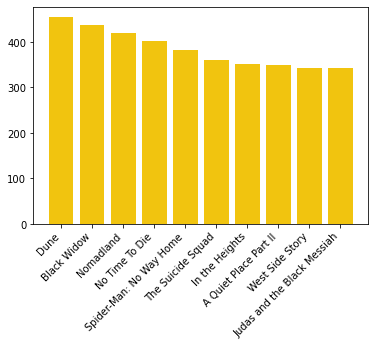

In [8]:
#Plotting the most reviewed movies for 2021
name1 = most_reviewed_movies_2021.head(10)['Name']
review1 = most_reviewed_movies_2021.head(10)['Review']
plt.bar(name1, review1, color="#F1C40F")
plt.xticks(rotation = 45, ha="right")
plt.show()

In [10]:
#Sorting the movies by the rating
most_rated_movies_2021 = df.sort_values(['Rate(%)'], ascending=False)
most_rated_movies_2021.head(10)

,Name,Rate(%),Review
33,Sabaya,100,45
29,Woodlands Dark and Days Bewitched: A History o...,100,49
26,Slalom,100,59
23,"Quo Vadis, Aida?",100,68
34,Hive,100,44
36,Azor,100,43
37,Paper Spiders,100,43
39,The Woman Who Ran,100,42
30,Luzzu,100,48
6,"Summer of Soul (...Or, When the Revolution Cou...",99,208


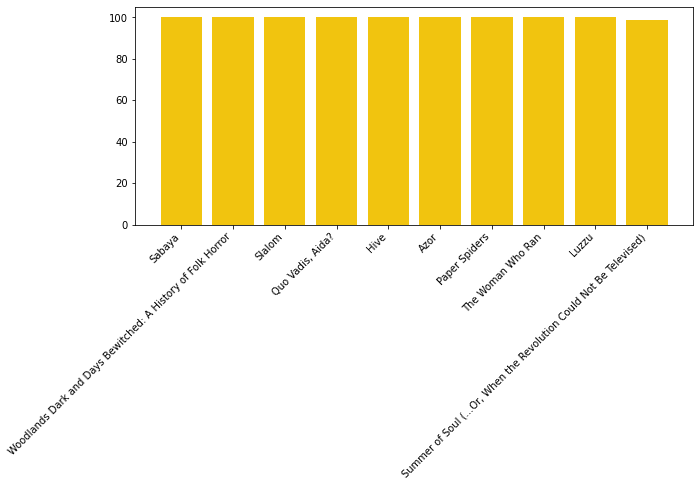

In [11]:
#Plotting the most rated movies for 2021
name2 = most_rated_movies_2021.head(10)['Name']
review2 = most_rated_movies_2021.head(10)['Rate(%)']
plt.figure(figsize=(10,4))
plt.bar(name2, review2, color="#F1C40F")
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
#Sorting the least rated movies
least_rated_movies_2021 = df.sort_values(['Rate(%)'], ascending=True)
least_rated_movies_2021.head(10)

,Name,Rate(%),Review
97,Black Widow,79,438
43,Dune,83,455
70,No Time To Die,83,403
90,Candyman,84,323
79,Belfast,87,271
96,Zola,87,239
89,Titane,88,225
91,Supernova,89,197
42,The Green Knight,89,311
52,King Richard,90,257


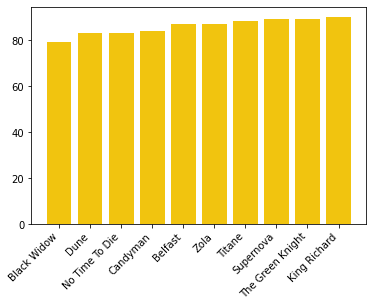

In [13]:
#Plotting the least rated movies for 2021
name3 = least_rated_movies_2021.head(10)['Name']
review3 = least_rated_movies_2021.head(10)['Rate(%)']
plt.bar(name3, review3, color="#F1C40F")
plt.xticks(rotation = 45, ha="right")
plt.show()


In [14]:
#Scraping and parsing data between 2012 to 2022
movie_year = []
movie_name = []
movie_rate = []
movie_review = []

years = range(2012,2022)

for year in years:
    html = "https://www.rottentomatoes.com/top/bestofrt/?year={date}"
    response = urlopen(html.format(date = year))
    soup = BeautifulSoup(response, "html.parser")
    
    movie_year.extend([year for n in range(0,100)])
    movie_name.extend([soup.find_all('a', 'unstyled articleLink')[i].string[13:-7] for i in range(43,143)])
    movie_rate.extend([re.split(('\n'),soup.find_all('span','tMeterIcon tiny')[i].get_text())[2][1:-1] for i in range(0,100)]) 
    movie_review.extend([soup.find_all('td','right hidden-xs')[i].get_text() for i in range(0,100)])

In [16]:
#Putting all the data into one dataframe
movie = pd.DataFrame({'Year':movie_year,'Name':movie_name,'Rate(%)':movie_rate, 'Review':movie_review})
movie['Rate(%)'] = movie['Rate(%)'].astype(int)
movie['Review'] = movie['Review'].astype(int)
movie

,Year,Name,Rate(%),Review
0,2012,Argo,96,360
1,2012,Skyfall,92,384
2,2012,Marvel's The Avengers,91,362
3,2012,Looper,93,270
4,2012,Moonrise Kingdom,93,266
...,...,...,...,...
995,2021,Zola,87,239
996,2021,Black Widow,79,438
997,2021,Some Kind of Heaven,93,84
998,2021,The Beta Test,93,80


In [18]:
#Calcualting review count of movie by year and check the mean value
tenyearsdata1 = movie.groupby('Year')['Review'].sum().reset_index()
print(tenyearsdata1.Review.mean())
tenyearsdata1


16502.2


,Year,Review
0,2012,13563
1,2013,13903
2,2014,14768
3,2015,16030
4,2016,17819
5,2017,19056
6,2018,20995
7,2019,19675
8,2020,14370
9,2021,14843


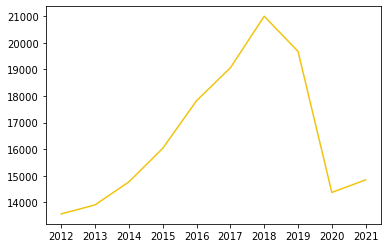

In [19]:
#Plotting the number of reviews by year
tenyear = tenyearsdata1['Year']
tenyear_reviews = tenyearsdata1['Review']
plt.plot(tenyear,tenyear_reviews, color="#F1C40F")
plt.xticks(tenyear)
plt.show()

In [20]:
#Calcualting average rate of movie by year and check the mean value
tenyearsdata2 = movie.groupby('Year')['Rate(%)'].mean().reset_index()
tenyearsdata2['Rate(%)'].mean()
tenyearsdata2 


,Year,Rate(%)
0,2012,90.31
1,2013,91.51
2,2014,92.60
3,2015,93.61
4,2016,93.48
5,2017,93.76
6,2018,94.11
7,2019,94.81
8,2020,96.13
9,2021,94.91


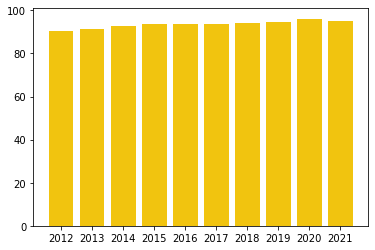

In [44]:
#Plotting the average movie rating by year
tenyear_rate = tenyearsdata2['Rate(%)']
plt.bar(tenyear,tenyear_rate, color="#F1C40F")
plt.xticks(tenyear)
plt.savefig('tenyears_average_rate.png')

In [21]:
#Top 10 reviewed movies between 2012 to 2021
mostReviewed= movie.sort_values(['Review'], ascending=False)
mostReviewed.head(10)

,Year,Name,Rate(%),Review
712,2019,Once Upon a Time In Hollywood,85,571
703,2019,Us,93,553
701,2019,Avengers: Endgame,94,547
731,2019,Captain Marvel,79,543
605,2018,A Star Is Born,90,528
600,2018,Black Panther,96,525
622,2018,Avengers: Infinity War,85,485
506,2017,Star Wars: The Last Jedi,91,483
502,2017,Wonder Woman,93,472
702,2019,Knives Out,97,468


In [22]:
#Top 10 rated movies between 2012 to 2021
highrated= movie.sort_values(['Rate(%)'], ascending=False)
highrated.head(10)

,Year,Name,Rate(%),Review
751,2019,Mickey and the Bear,100,45
536,2017,Dawson City: Frozen Time,100,61
434,2016,O.J.: Made in America,100,53
436,2016,The Age of Shadows,100,49
438,2016,Fireworks Wednesday (Chaharshanbe-soori),100,45
756,2019,Changing the Game,100,41
541,2017,Strong Island,100,48
539,2017,Bright Lights: Starring Carrie Fisher and Debb...,100,57
938,2021,The Woman Who Ran,100,42
538,2017,The Work,100,58


In [23]:
#Top 10 leasted rated movies between 2012 to 2021
lowrated= movie.sort_values(['Rate(%)'], ascending=True)
lowrated.head(10)

,Year,Name,Rate(%),Review
93,2012,Brave,78,253
392,2015,The Revenant,78,401
171,2013,Iron Man 3,79,329
95,2012,Magic Mike,79,215
99,2012,The Grey,79,209
896,2020,Birds of Prey (And the Fantabulous Emancipatio...,79,430
731,2019,Captain Marvel,79,543
193,2013,Saving Mr. Banks,79,266
187,2013,The Wolf of Wall Street,79,287
996,2021,Black Widow,79,438


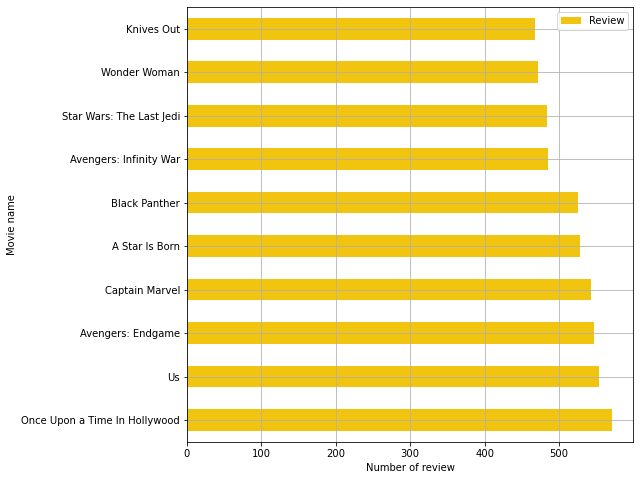

In [25]:
#plotting the top 10 most reviewed movies and the number of reviews
movie_unique = pd.pivot_table(movie, values='Review' ,index=['Name'])
movie_best = movie_unique.sort_values(by='Review', ascending=False)
data =movie_best.head(10)

data.plot(kind = 'barh', grid =True, figsize = (8,8), color = '#F1C40F')
plt.ylabel("Movie name")
plt.xlabel("Number of review")
plt.show()

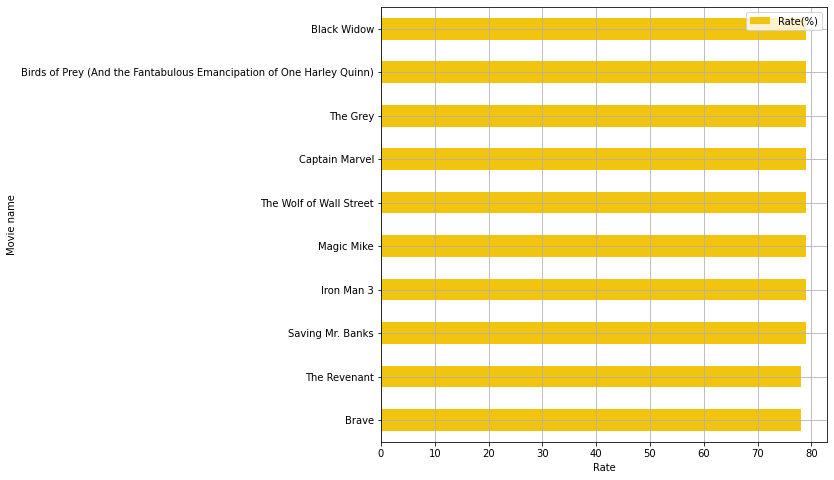

In [26]:
#plotting the top 10 leaste rated movies and the number of reviews
movie_unique = pd.pivot_table(movie, values='Rate(%)',index=['Name'])
movie_lowrate = movie_unique.sort_values(by='Rate(%)',ascending = True)
data = movie_lowrate.head(10)

data.plot(kind = 'barh', grid =True, figsize = (8,8), color = '#F1C40F')
plt.ylabel("Movie name")
plt.xlabel("Rate")
plt.legend(['Rate(%)'], loc='upper right')
plt.show()